In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
df = pd.read_csv(r'./data.csv')
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Area
0,USA,80270563.0,NaN,963371.0,NaN,52199829.0,NaN,27107363.0,10400.0,240195.0,2883.0,942817780.0,2821212.0,3.341889e+08,North America
1,India,42867031.0,NaN,512652.0,NaN,42189887.0,NaN,164492.0,8944.0,30570.0,366.0,762414018.0,543699.0,1.402273e+09,Asia
2,Brazil,28351876.0,NaN,645534.0,NaN,25505984.0,NaN,2200358.0,8318.0,131845.0,3002.0,63776166.0,296579.0,2.150396e+08,South America
3,France,22401406.0,NaN,137276.0,NaN,19735713.0,NaN,2528417.0,3055.0,341951.0,2095.0,243529298.0,3717401.0,6.551063e+07,Europe
4,UK,18695449.0,NaN,160815.0,NaN,16918511.0,NaN,1616123.0,324.0,273040.0,2349.0,477969909.0,6980577.0,6.847141e+07,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Vatican City,29.0,NaN,NaN,NaN,28.0,NaN,1.0,NaN,36070.0,NaN,NaN,NaN,8.040000e+02,Europe
216,Vanuatu,15.0,NaN,1.0,NaN,6.0,NaN,8.0,NaN,47.0,3.0,23000.0,72120.0,3.189150e+05,Australia/Oceania
217,Western Sahara,10.0,NaN,1.0,NaN,8.0,NaN,1.0,NaN,16.0,2.0,NaN,NaN,6.214210e+05,Africa
218,Cook Islands,6.0,2.0,NaN,NaN,NaN,NaN,6.0,NaN,341.0,NaN,1115.0,63388.0,1.759000e+04,Australia/Oceania


In [27]:
df.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
count,2.200000e+02,21.000000,214.000000,15.000000,2.110000e+02,18.000000,2.120000e+02,164.000000,220.000000,214.000000,2.090000e+02,2.090000e+02,2.200000e+02
mean,1.946886e+06,16529.809524,27689.700935,90.066667,1.678453e+06,24416.222222,3.021103e+05,488.902439,119418.618182,1096.738318,2.784070e+07,1.745723e+06,3.583223e+07
std,6.949375e+06,38719.579773,95671.131549,183.531028,5.480625e+06,49825.242442,1.908991e+06,1401.433780,125659.238372,1164.481737,1.004763e+08,3.044821e+06,1.406396e+08
min,6.000000e+00,2.000000,1.000000,1.000000,3.000000e+00,54.000000,1.000000e+00,1.000000,16.000000,2.000000,1.115000e+03,5.113000e+03,8.040000e+02
25%,2.571600e+04,205.000000,276.500000,7.000000,1.725950e+04,637.750000,1.031500e+03,8.000000,8877.750000,148.750000,3.478150e+05,1.352730e+05,6.390642e+05
50%,1.579640e+05,1232.000000,2185.500000,28.000000,1.243700e+05,4247.500000,1.377500e+04,50.000000,82518.500000,708.000000,2.026898e+06,7.032090e+05,6.620362e+06
75%,1.002080e+06,14307.000000,13684.500000,54.000000,9.029600e+05,19101.750000,1.206895e+05,231.000000,198196.750000,1775.500000,1.157501e+07,1.878710e+06,2.432625e+07
max,8.027056e+07,171448.000000,963371.000000,706.000000,5.219983e+07,202900.000000,2.710736e+07,10400.000000,651725.000000,6221.000000,9.428178e+08,2.140420e+07,1.439324e+09


### Tình hình Covid thế giới

In [68]:
col = ['TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical']
data = [df[i].sum() for i in col]

px.line_polar(r=data,theta=col,line_close=True)

### Số ca nhiễm theo từng khu vực trên thế giới

<BarContainer object of 6 artists>

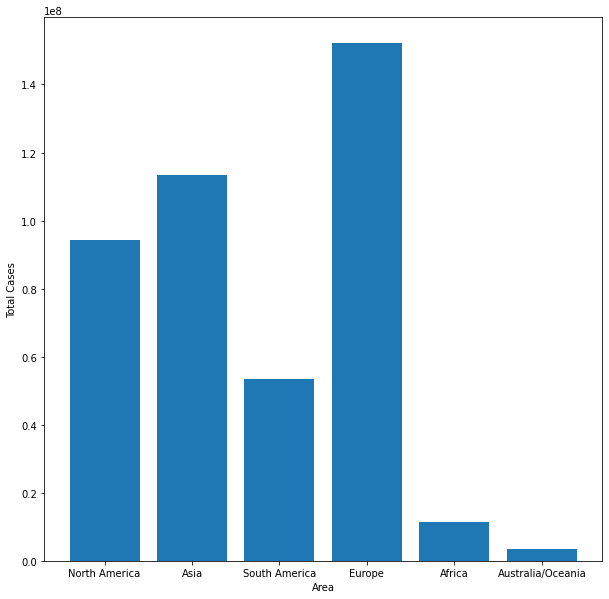

In [54]:
plt.figure(figsize=(10,10))
area = pd.unique(df['Area'])
totalCases = [df[df['Area'] == i]['TotalCases'].sum() for i in area]

plt.xlabel('Area')
plt.ylabel('Total Cases')

plt.bar(area,totalCases)

### Tình hình Covid ở các khu vực

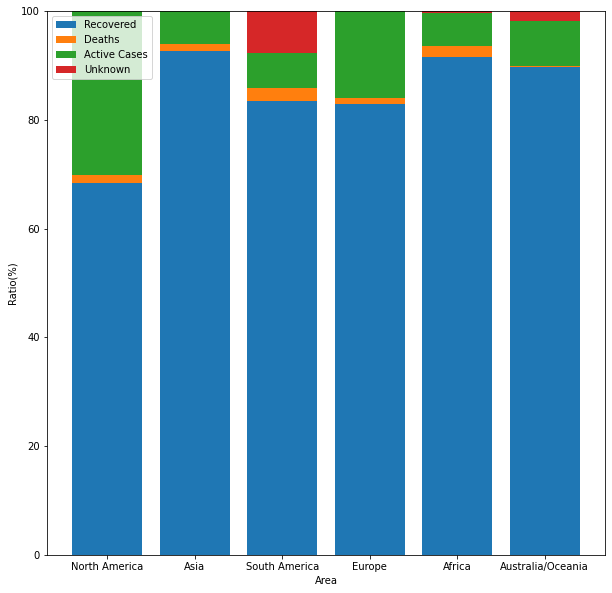

In [62]:
plt.figure(figsize=(10,10))

totalDeaths = np.array([df[df['Area'] == i]['TotalDeaths'].sum() for i in area])
totalRecovered = np.array([df[df['Area'] == i]['TotalRecovered'].sum() for i in area])
totalActiveCases = np.array([df[df['Area'] == i]['ActiveCases'].sum() for i in area])

DeathsRatio = (totalDeaths/totalCases) * 100
RecoveredRatio = (totalRecovered/totalCases) * 100
ActiveCasesRatio = (totalActiveCases/totalCases) * 100
Unknown = 100 - (DeathsRatio+RecoveredRatio+ActiveCasesRatio)

plt.xlabel('Area')
plt.ylabel('Ratio(%)')


p1 = plt.bar(area,RecoveredRatio,label='Recovered')
p2 = plt.bar(area,DeathsRatio, bottom = RecoveredRatio, label = 'Deaths')
p3 = plt.bar(area,ActiveCasesRatio, bottom = RecoveredRatio+DeathsRatio, label = 'Active Cases')
p3 = plt.bar(area,Unknown, bottom = RecoveredRatio+DeathsRatio+ActiveCasesRatio, label = 'Unknown')
plt.legend()


### Tình hình Covid ở VN

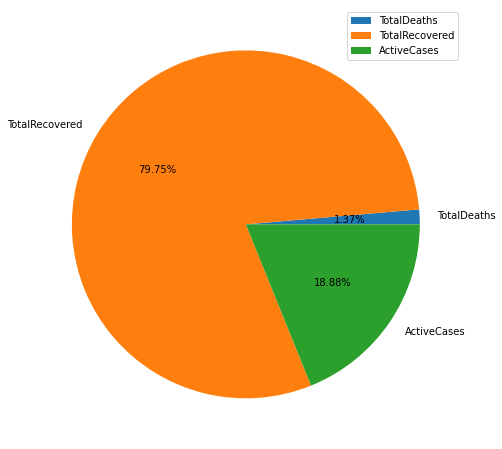

In [64]:
col = ['TotalDeaths','TotalRecovered','ActiveCases']
dataOfVn = df[df['Country,Other']=='Vietnam'][col]
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
plt.pie(dataOfVn.values[0],labels = col,autopct="%1.2f%%")
plt.legend()